In [171]:
import numpy as np
import pandas as pd
import os
from datetime import datetime,timedelta
import math
import matplotlib.pyplot as plt
import seaborn  

In [172]:
from_str='2020-01-01'
to_str='2022-12-31'
feq ='Q'  # support month=M,quater=Q,year=Y
title=f"SMALL-THAI-{feq}"

isPrintEcahPeriod=False

#data_file=data_path=r"D:\PythonDev\MyQuantFinProject\Data\TiscoThai_y20t22.csv"
data_file=data_path=r"D:\PythonDev\MyQuantFinProject\Data\THAI-SMALL_Y20ToNow.csv"

# Build Asset Timeseries

In [173]:
period_index=pd.date_range(start=from_str,end=to_str, freq=feq)
print(period_index)

# create StartDate as Nan
fundPerfByPeriod_df=pd.DataFrame(index=period_index,columns=['Start_Date'])

# move index to EndDate column
fundPerfByPeriod_df.reset_index(drop=False,inplace=True)

# change columns  index,Start_Date =End_Date,Start_Date
fundPerfByPeriod_df.columns=['End_Date','Start_Date']
# change column order
fundPerfByPeriod_df=fundPerfByPeriod_df[['Start_Date','End_Date']]

print(f"Create the first day of {feq} by iteration")
# print(fundPerfByPeriod_df)

for index,row in fundPerfByPeriod_df.iterrows():
    if index==0:
       fundPerfByPeriod_df.iloc[0,0]=datetime.strptime(from_str,'%Y-%m-%d')
    else:
        # get End_Date(last day of Year, Quater,Month) of previouse row 
        prev_end_date= fundPerfByPeriod_df.iloc[index-1,1] 
        start_date=prev_end_date + timedelta(days = 1) # 
        fundPerfByPeriod_df.iloc[index,0]=start_date 
fundPerfByPeriod_df['Start_Date']=pd.to_datetime(fundPerfByPeriod_df['Start_Date'],format='%Y-%m-%d %H:%M:%S')    

fundPerfByPeriod_df['Period']= fundPerfByPeriod_df.apply( lambda item:f"{item['Start_Date'].strftime('%d')}{item['Start_Date'].strftime('%b')}{item['Start_Date'].strftime('%y')}_{item['End_Date'].strftime('%d')}{item['End_Date'].strftime('%b')}{item['End_Date'].strftime('%y')}"  ,axis=1  )
fundPerfByPeriod_df.info()

print(f"Created {feq} Time Series")
fundPerfByPeriod_df



DatetimeIndex(['2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'], dtype='datetime64[ns]', freq='Q-DEC')
Create the first day of Q by iteration
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Date  4 non-null      datetime64[ns]
 1   End_Date    4 non-null      datetime64[ns]
 2   Period      4 non-null      object        
dtypes: datetime64[ns](2), object(1)
memory usage: 224.0+ bytes
Created Q Time Series


,Start_Date,End_Date,Period
0,2022-01-01,2022-03-31,01Jan22_31Mar22
1,2022-04-01,2022-06-30,01Apr22_30Jun22
2,2022-07-01,2022-09-30,01Jul22_30Sep22
3,2022-10-01,2022-12-31,01Oct22_31Dec22


# Load data and Transform

In [174]:
# source file : Ticker,Date/Time,open,high,low,close,Volume
df = pd.read_csv(data_file,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)

df.index.set_names('date',inplace=True)
df.rename(columns={'Ticker':'symbol','close':'price'},inplace=True)

df=df[['symbol','price']]
df.info()
print(df.tail(10))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7495 entries, 2022-02-28 to 2023-02-02
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  7495 non-null   object 
 1   price   7495 non-null   float64
dtypes: float64(1), object(1)
memory usage: 175.7+ KB
               symbol  price
date                        
2023-01-20  TISCOMS-A  21.24
2023-01-23  TISCOMS-A  21.26
2023-01-24  TISCOMS-A  21.28
2023-01-25  TISCOMS-A  21.18
2023-01-26  TISCOMS-A  20.92
2023-01-27  TISCOMS-A  21.12
2023-01-30  TISCOMS-A  21.18
2023-01-31  TISCOMS-A  21.21
2023-02-01  TISCOMS-A  21.42
2023-02-02  TISCOMS-A  21.55


# Group Data by Symbol and store in dictionary

In [175]:
list_fund_name=df['symbol'].unique().tolist()  
#print(list_fund_name)
#list_fund_name=['KKP-TQG', 'KKP-SM-CAP', 'K-MIDSMALL', 'TISCOMS-A']
print(list_fund_name)

['KKP-TQG', 'ASP-SME', 'KKP-SM-CAP', 'KFTHAISM', 'K-MIDSMALL', 'TISCOMS-A']


In [176]:
dictPriceOfFund={}
# key is symbol
# store price dataframe as value in dictionary

for name in list_fund_name:

  fund_df=df.query('symbol==@name')   # https://sparkbyexamples.com/pandas/pandas-dataframe-query-examples/
  fund_df=fund_df.loc[from_str:to_str,['price']]   #https://www.geeksforgeeks.org/python-pandas-dataframe-loc/
  fund_df.sort_index(inplace=True)    #https://www.geeksforgeeks.org/python-pandas-dataframe-sort_index/
  if len(fund_df)  >0:
      # price/symbol
      dictPriceOfFund[name]=fund_df
      print(f"======={name} : {len(fund_df)}==========")  
      print(fund_df.tail(3))   

=======KKP-TQG : 203==========
            price
date             
2022-12-28   8.77
2022-12-29   8.85
2022-12-30   8.89
=======ASP-SME : 241==========
            price
date             
2022-12-28  17.59
2022-12-29  17.69
2022-12-30  17.63
=======KKP-SM-CAP : 235==========
            price
date             
2022-12-28  16.93
2022-12-29  16.99
2022-12-30  17.06
=======KFTHAISM : 241==========
            price
date             
2022-12-28  14.33
2022-12-29  14.42
2022-12-30  14.39
=======K-MIDSMALL : 241==========
            price
date             
2022-12-28  17.70
2022-12-29  17.80
2022-12-30  17.76
=======TISCOMS-A : 241==========
            price
date             
2022-12-28  20.48
2022-12-29  20.59
2022-12-30  20.61


# Create directory to store chart and excel

In [177]:
report_path="D:\PythonDev\MyQuantFinProject\Data\Report"
report_path=os.path.join (report_path, f"{title}-{feq}-{from_str}_{to_str}")
if not os.path.exists(report_path):
 os.makedirs(report_path)

# Calculate CumProd by Pct_Change

In [178]:
# calculate percent change (current-prev)/prev*100  and cumulative return 
def create_pct_acc_df(df_temp,start_pct,end_pct):
    
 df_temp=fund_df.loc[start_pct:end_pct,:]
 df_temp=df_temp.pct_change()  
 df_temp=(1+df_temp).cumprod()  #1 is starting point
 df_temp=df_temp.rename(columns={'price':'cum_return_pct'})
 df_temp.fillna(1,inplace=True)


 return df_temp 

# Plot Line Chart to compare price movement

plot chart line to compare return performace entire period
plot chart line to compare return performace on each period


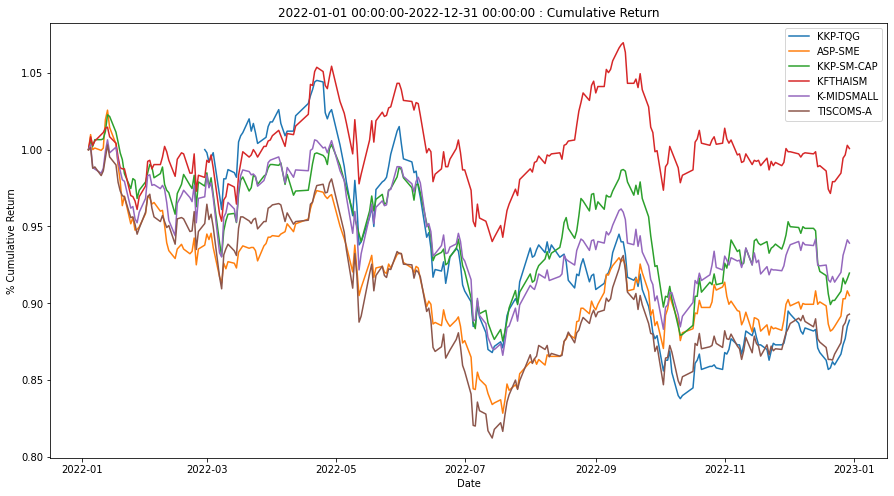

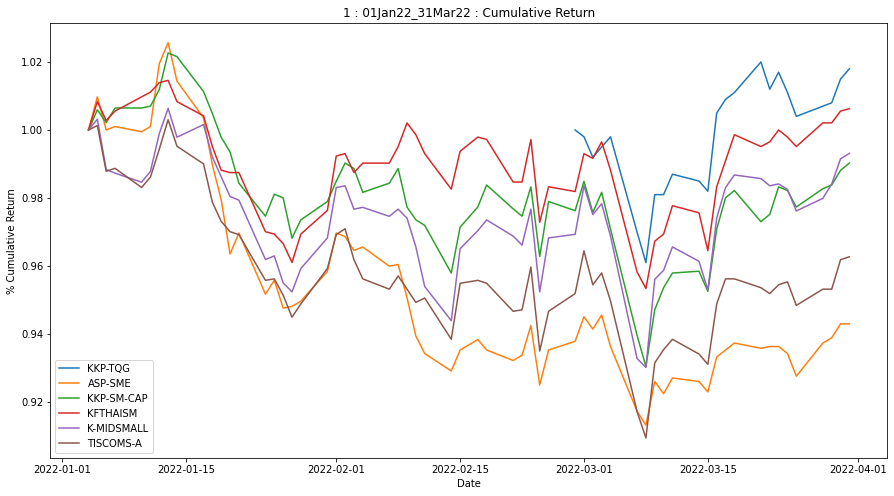

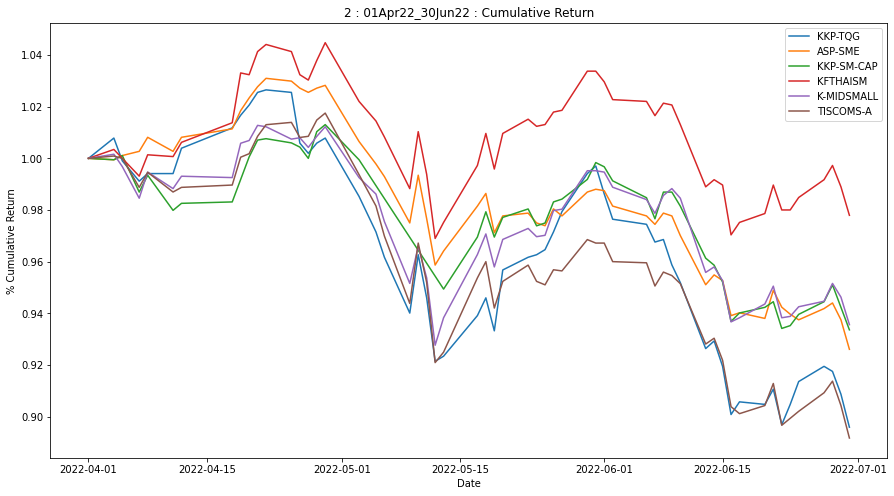

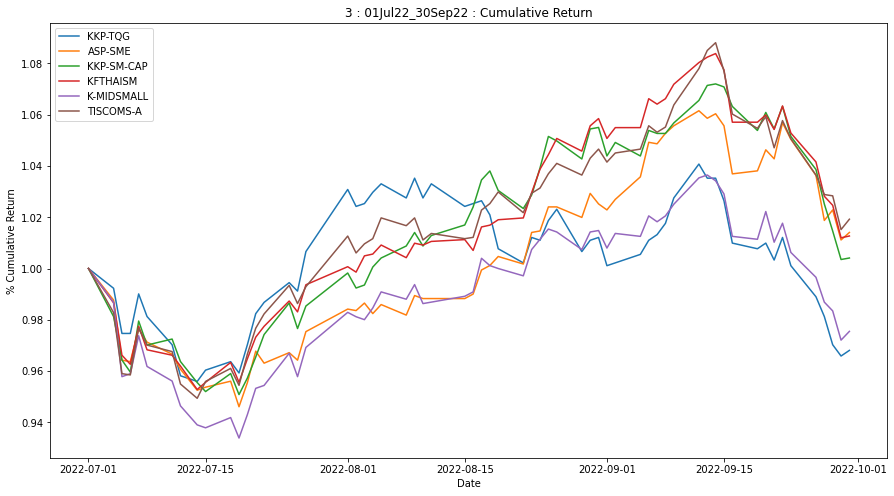

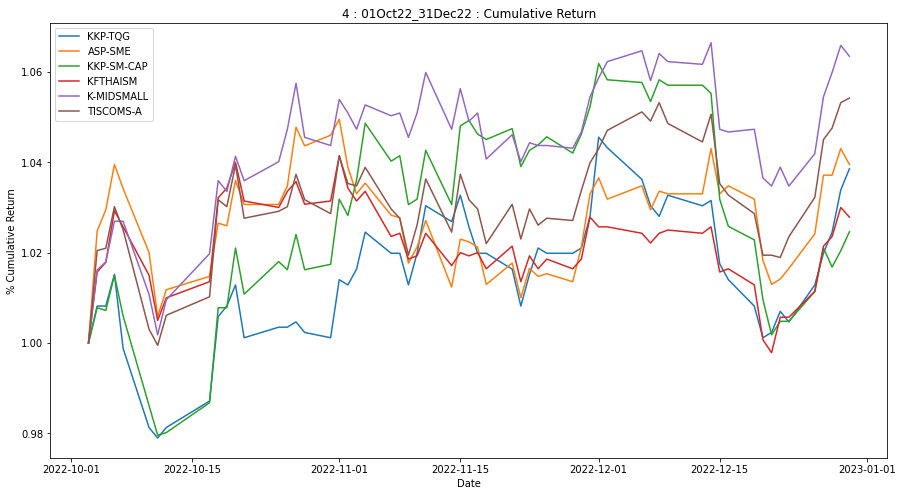

In [179]:
print("plot chart line to compare return performace entire period")
start_date=fundPerfByPeriod_df.loc[0,'Start_Date']
end_date=fundPerfByPeriod_df.loc[len(fundPerfByPeriod_df)-1,'End_Date']

fig = plt.figure(figsize = (15, 8))
for fund_name,fund_df in dictPriceOfFund.items():
  df=create_pct_acc_df(fund_df,start_date,end_date)  
  #print(df.head())
  plt.plot(df.index,df['cum_return_pct'],label =fund_name)  
plt.legend() 
plt.xlabel("Date")
plt.ylabel("% Cumulative Return")

plt.title(f"{start_date}-{end_date} : Cumulative Return")
plt.savefig(f'{report_path}\\All Movement.png')

print("plot chart line to compare return performace on each period")
count_pic=0
for index,item in fundPerfByPeriod_df.iterrows():
    
    start_date=item['Start_Date']
    end_date=item['End_Date'] 
    # print(start_date)
    fig = plt.figure(figsize = (15, 8))
    for fund_name,fund_df in dictPriceOfFund.items():
      df=create_pct_acc_df(fund_df,start_date,end_date)  
      #print(df.head())
      plt.plot(df.index,df['cum_return_pct'],label =fund_name)  
    plt.legend() 
    plt.xlabel("Date")
    plt.ylabel("% Cumulative Return")
    
    count_pic=count_pic+1
    plt.title(f"{count_pic} : {item['Period']} : Cumulative Return")
    if isPrintEcahPeriod:
     plt.savefig(f'{report_path}\\{count_pic}-{item["Period"]}.png')
    
    plt.show()

# Find Percent of Change (ROC) and  Statistic description

In [180]:
def cal_percent_return(item,fundTemp_df):
    
    start_date=item['Start_Date']
    end_date=item['End_Date']
    
    # filter by date to find ROC of price column during the period
    tempDF=fundTemp_df.loc[start_date:end_date,:]
    if tempDF.empty==False:

        start_price=float(tempDF.iloc[0, 0])  # the first record of fund during the given period (timeframe)
        end_price=float(tempDF.iloc[len(tempDF)-1, 0]) # the last record of fund during the given period (timeframe)

        invest_return =(end_price-start_price)/start_price*100
        invest_return=round(invest_return,2)    

        print(f"{start_date.strftime('%d%b%y')} to {end_date.strftime('%d%b%y')}: ROC = ({end_price}-{start_price})/{start_price}x100= {invest_return} %")

        return invest_return
    else:
        return 0

print("Add column by each ROC of symbol")
for name,data in dictPriceOfFund.items():

  print(f"=========================={name} - cal_percent_return==================================================")
  fundPerfByPeriod_df[name]=fundPerfByPeriod_df.apply(cal_percent_return,axis=1,args=(data,))
  print("***********************************************************************************************")

fundPerfByPeriod_df["_AVG_"]=fundPerfByPeriod_df[list_fund_name].mean(axis=1,skipna=True).round(2)

fundPerfByPeriod_df.set_index('Period',inplace=True)   
fundPerfByPeriod_df

Add column by each ROC of symbol
==========================KKP-TQG - cal_percent_return==================================================
01Jan22 to 31Mar22: ROC = (10.18-10.0)/10.0x100= 1.8 %
01Apr22 to 30Jun22: ROC = (9.12-10.18)/10.18x100= -10.41 %
01Jul22 to 30Sep22: ROC = (8.79-9.08)/9.08x100= -3.19 %
01Oct22 to 31Dec22: ROC = (8.89-8.56)/8.56x100= 3.86 %
***********************************************************************************************
==========================ASP-SME - cal_percent_return==================================================
01Jan22 to 31Mar22: ROC = (18.37-19.48)/19.48x100= -5.7 %
01Apr22 to 30Jun22: ROC = (17.03-18.39)/18.39x100= -7.4 %
01Jul22 to 30Sep22: ROC = (17.3-17.06)/17.06x100= 1.41 %
01Oct22 to 31Dec22: ROC = (17.63-16.96)/16.96x100= 3.95 %
***********************************************************************************************
==========================KKP-SM-CAP - cal_percent_return==================================================
0

,Start_Date,End_Date,KKP-TQG,ASP-SME,KKP-SM-CAP,KFTHAISM,K-MIDSMALL,TISCOMS-A,_AVG_
Period,,,,,,,,,
01Jan22_31Mar22,2022-01-01,2022-03-31,1.80,-5.70,-0.97,0.63,-0.69,-3.73,-1.44
01Apr22_30Jun22,2022-04-01,2022-06-30,-10.41,-7.40,-6.64,-2.21,-6.44,-10.83,-7.32
01Jul22_30Sep22,2022-07-01,2022-09-30,-3.19,1.41,0.41,1.27,-2.45,1.92,-0.11
01Oct22_31Dec22,2022-10-01,2022-12-31,3.86,3.95,2.46,2.79,6.35,5.42,4.14


# Find rank of each fund between peers

In [181]:
def find_rank(fund_temp,list_fundX,FinalRank_ColName):
    fundPerfRank=fund_temp[list_fundX]
    # fundPerfRank.index.set_names('Period',inplace=True)
    fundPerfRank=fundPerfRank.T # transpose to find rank
    #print(fundPerfRank)
    
    for colNameToRank in fundPerfRank.columns:
      fundPerfRank[colNameToRank]=fundPerfRank[colNameToRank].rank(method='max')    
    
    return fundPerfRank
rankCol_name_all='AllRank'
fundRank_df=find_rank(fundPerfByPeriod_df[list_fund_name],list_fund_name,rankCol_name_all)
fundRank_df=fundRank_df.T  # tranpose back to same format as others
fundRank_df


,KKP-TQG,ASP-SME,KKP-SM-CAP,KFTHAISM,K-MIDSMALL,TISCOMS-A
Period,,,,,,
01Jan22_31Mar22,6.0,1.0,3.0,5.0,4.0,2.0
01Apr22_30Jun22,2.0,3.0,4.0,6.0,5.0,1.0
01Jul22_30Sep22,1.0,5.0,3.0,4.0,2.0,6.0
01Oct22_31Dec22,3.0,4.0,1.0,2.0,6.0,5.0


# Compared  whether outperform its peers or not

In [182]:
fundPerfByPeriod_df

,Start_Date,End_Date,KKP-TQG,ASP-SME,KKP-SM-CAP,KFTHAISM,K-MIDSMALL,TISCOMS-A,_AVG_
Period,,,,,,,,,
01Jan22_31Mar22,2022-01-01,2022-03-31,1.80,-5.70,-0.97,0.63,-0.69,-3.73,-1.44
01Apr22_30Jun22,2022-04-01,2022-06-30,-10.41,-7.40,-6.64,-2.21,-6.44,-10.83,-7.32
01Jul22_30Sep22,2022-07-01,2022-09-30,-3.19,1.41,0.41,1.27,-2.45,1.92,-0.11
01Oct22_31Dec22,2022-10-01,2022-12-31,3.86,3.95,2.46,2.79,6.35,5.42,4.14


In [183]:

def comapre_to_avg(row,fund_name):
    if row[fund_name]>row['_AVG_']:
        return 1
    else:
        return 0
fundRefAvgScore_df= pd.DataFrame(index=fundPerfByPeriod_df.index)
# for index,item in fundPerfByPeriod_df.iterrows():
for fund_name in list_fund_name:
    fundRefAvgScore_df[fund_name]=fundPerfByPeriod_df.apply(comapre_to_avg,axis=1,args=(fund_name,))
fundRefAvgScore_df

,KKP-TQG,ASP-SME,KKP-SM-CAP,KFTHAISM,K-MIDSMALL,TISCOMS-A
Period,,,,,,
01Jan22_31Mar22,1,0,1,1,1,0
01Apr22_30Jun22,0,0,1,1,1,0
01Jul22_30Sep22,0,1,1,1,0,1
01Oct22_31Dec22,0,0,0,0,1,1


# Summary total return and the number of time to beat the average return

In [184]:
dfSummary=pd.concat([\
                     fundPerfByPeriod_df[list_fund_name].sum().to_frame(name='total_return'),\
                     fundRank_df.sum().to_frame(name='sum_rank_score'),\
                     fundRefAvgScore_df.sum().to_frame(name='sum_outperform_avg')  
                    ],axis=1)
dfSummary.fillna(value=0,inplace=True)
dfSummary


,total_return,sum_rank_score,sum_outperform_avg
KKP-TQG,-7.94,12.0,1
ASP-SME,-7.74,13.0,1
KKP-SM-CAP,-4.74,11.0,3
KFTHAISM,2.48,17.0,3
K-MIDSMALL,-3.23,17.0,3
TISCOMS-A,-7.22,14.0,2


# Final Score by sum of rank of all criteria

In [185]:
dfFinalScore=pd.DataFrame(index=dfSummary.index)

for colNameToRank in dfSummary.columns:
  dfFinalScore[f"{colNameToRank}_rank"]=dfSummary[colNameToRank].rank(method='max')  
dfFinalScore=pd.concat([dfFinalScore,dfFinalScore.sum(axis=1).to_frame("TotalScore")],axis=1)
dfFinalScore

,total_return_rank,sum_rank_score_rank,sum_outperform_avg_rank,TotalScore
KKP-TQG,1.0,2.0,2.0,5.0
ASP-SME,2.0,3.0,2.0,7.0
KKP-SM-CAP,4.0,1.0,6.0,11.0
KFTHAISM,6.0,6.0,6.0,18.0
K-MIDSMALL,5.0,6.0,6.0,17.0
TISCOMS-A,3.0,4.0,3.0,10.0


In [186]:
dfSummary=pd.merge(left=dfSummary,right=dfFinalScore,left_index=True,right_index=True)
dfSummary.sort_values(by='TotalScore',ascending=False,inplace=True)
dfSummary

,total_return,sum_rank_score,sum_outperform_avg,total_return_rank,sum_rank_score_rank,sum_outperform_avg_rank,TotalScore
KFTHAISM,2.48,17.0,3,6.0,6.0,6.0,18.0
K-MIDSMALL,-3.23,17.0,3,5.0,6.0,6.0,17.0
KKP-SM-CAP,-4.74,11.0,3,4.0,1.0,6.0,11.0
TISCOMS-A,-7.22,14.0,2,3.0,4.0,3.0,10.0
ASP-SME,-7.74,13.0,1,2.0,3.0,2.0,7.0
KKP-TQG,-7.94,12.0,1,1.0,2.0,2.0,5.0


In [188]:
dfSummary.sort_index(axis=1,ascending=False,inplace=True)

In [189]:
dfSummary

,total_return_rank,total_return,sum_rank_score_rank,sum_rank_score,sum_outperform_avg_rank,sum_outperform_avg,TotalScore
KFTHAISM,6.0,2.48,6.0,17.0,6.0,3,18.0
K-MIDSMALL,5.0,-3.23,6.0,17.0,6.0,3,17.0
KKP-SM-CAP,4.0,-4.74,1.0,11.0,6.0,3,11.0
TISCOMS-A,3.0,-7.22,4.0,14.0,3.0,2,10.0
ASP-SME,2.0,-7.74,3.0,13.0,2.0,1,7.0
KKP-TQG,1.0,-7.94,2.0,12.0,2.0,1,5.0


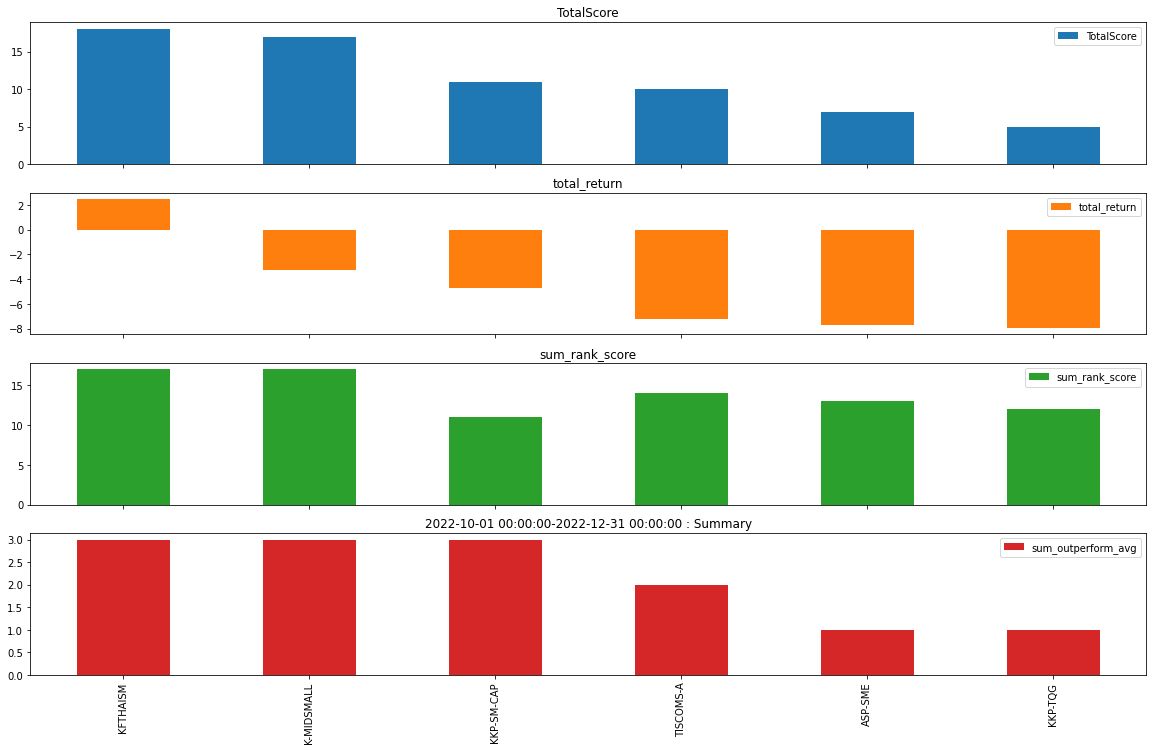

In [190]:
colToPlots=['TotalScore','total_return','sum_rank_score','sum_outperform_avg' ]

dfSummary[colToPlots].plot(kind='bar',layout=(len(colToPlots),1),
                      subplots=True,figsize=(20, 3*len(colToPlots)))
plt.title(f"{start_date}-{end_date} : Summary")
plt.savefig(f'{report_path}\\{from_str}-{to_str}-summary.png')
   
plt.show()


# Find Statistical Description

In [116]:
statDesc_df=fundPerfByPeriod_df[list_fund_name].describe()
# statDesc_df =statDesc_df.T
# statDesc_df=statDesc_df.loc[:]   
statDesc_df.loc[['mean','50%', 'std','max','min'],:]

,KKP-TQG,ASP-SME,KKP-SM-CAP,KFTHAISM,K-MIDSMALL,TISCOMS-A
mean,-1.985000,-1.935000,-1.185000,0.620000,-0.807500,-1.805000
50%,-0.695000,-2.145000,-0.280000,0.950000,-1.570000,-0.905000
std,6.348829,5.473077,3.900141,2.092877,5.343734,7.100059
max,3.860000,3.950000,2.460000,2.790000,6.350000,5.420000
min,-10.410000,-7.400000,-6.640000,-2.210000,-6.440000,-10.830000


# Plot Bar Perfoamce

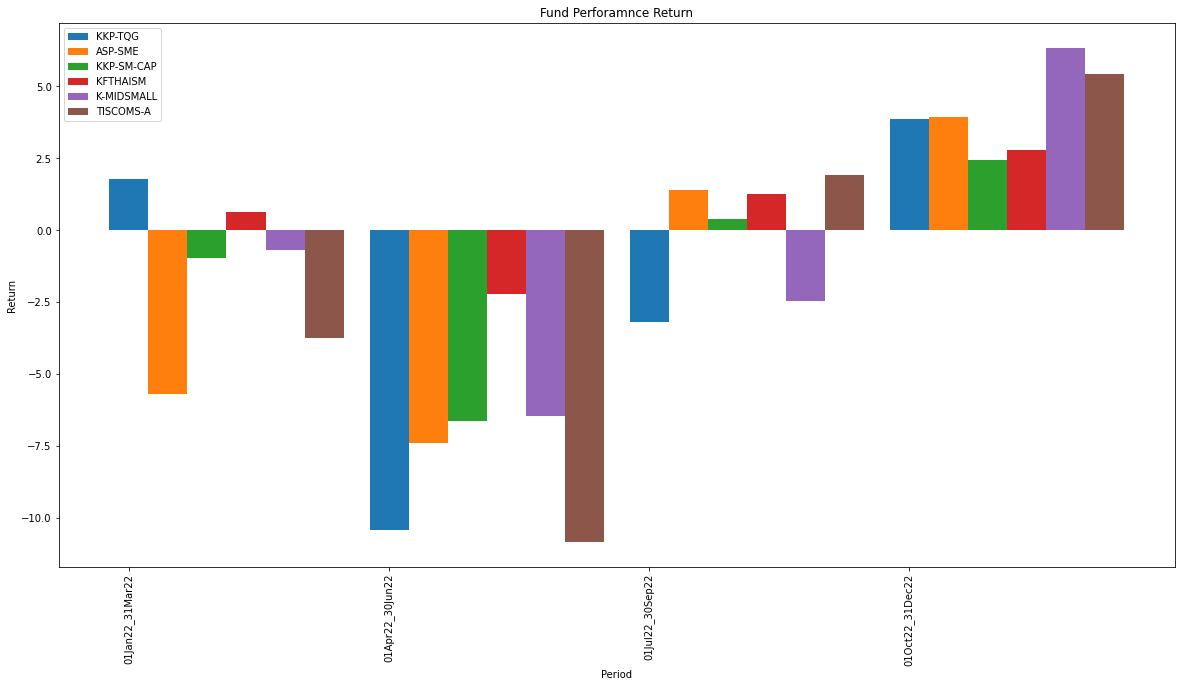

In [117]:
fundReturn_df=fundPerfByPeriod_df[list_fund_name]
fig = plt.figure(figsize = (20, 10))
X_axis = np.arange(len(fundReturn_df)) # length of column to fix axis=y
X_point=0.00
X_width=0.15

for colName  in fundReturn_df.columns:
    
    plt.bar(X_axis+X_point,fundReturn_df[colName],X_width, label =colName)
    X_point+=X_width

# length of column to fix axis=y
plt.xticks(X_axis, fundReturn_df.index,rotation='vertical')
plt.xlabel("Period")
plt.ylabel("Return")
plt.title(f"Fund Perforamnce Return")
plt.legend()

plt.savefig(f'{report_path}\\Return_{from_str}_{to_str}.png')

plt.show()



# Plot correlation

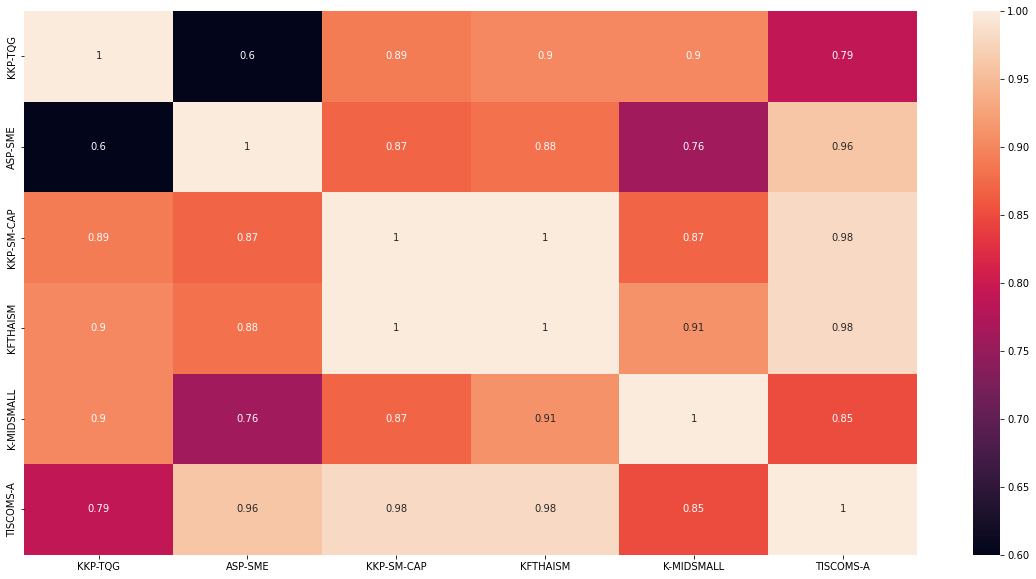

,KKP-TQG,ASP-SME,KKP-SM-CAP,KFTHAISM,K-MIDSMALL,TISCOMS-A
KKP-TQG,1.00,0.60,0.89,0.90,0.90,0.79
ASP-SME,0.60,1.00,0.87,0.88,0.76,0.96
KKP-SM-CAP,0.89,0.87,1.00,1.00,0.87,0.98
KFTHAISM,0.90,0.88,1.00,1.00,0.91,0.98
K-MIDSMALL,0.90,0.76,0.87,0.91,1.00,0.85
TISCOMS-A,0.79,0.96,0.98,0.98,0.85,1.00


In [118]:
corr_df = fundReturn_df.corr ()  
corr_df = corr_df .round(2)

fig = plt.figure(figsize = (20, 10))
heatmap = seaborn. heatmap(corr_df, annot = True)  

plt.savefig(f'{report_path}\\Corr_{from_str}_{to_str}.png')
plt. show ()  

corr_df

In [119]:
# add last row to find sum

fundSummaryReturn=fundPerfByPeriod_df.sum().to_frame(f"All Period").T
fundSummaryReturn.insert(0,"Start_Date",from_str,True)
fundSummaryReturn.insert(1,"End_Date",from_str,True)
fundSummaryReturn=  pd.concat([fundPerfByPeriod_df,fundSummaryReturn])
fundSummaryReturn

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_5736\103717733.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fundSummaryReturn=fundPerfByPeriod_df.sum().to_frame(f"All Period").T


,Start_Date,End_Date,KKP-TQG,ASP-SME,KKP-SM-CAP,KFTHAISM,K-MIDSMALL,TISCOMS-A,_AVG_
01Jan22_31Mar22,2022-01-01 00:00:00,2022-03-31 00:00:00,1.80,-5.70,-0.97,0.63,-0.69,-3.73,-1.44
01Apr22_30Jun22,2022-04-01 00:00:00,2022-06-30 00:00:00,-10.41,-7.40,-6.64,-2.21,-6.44,-10.83,-7.32
01Jul22_30Sep22,2022-07-01 00:00:00,2022-09-30 00:00:00,-3.19,1.41,0.41,1.27,-2.45,1.92,-0.11
01Oct22_31Dec22,2022-10-01 00:00:00,2022-12-31 00:00:00,3.86,3.95,2.46,2.79,6.35,5.42,4.14
All Period,2022-01-01,2022-01-01,-7.94,-7.74,-4.74,2.48,-3.23,-7.22,-4.73


In [120]:
report_file = os.path .join(report_path, "Report.xlsx")
writer=pd.ExcelWriter(report_file,engine='xlsxwriter') 
fundPerfByPeriod_df.to_excel(writer, sheet_name="Return")
fundSummaryReturn.to_excel(writer, sheet_name="SumReturn")
fundRefAvgScore_df.to_excel(writer, sheet_name="OutperformAVG")
fundRank_df.to_excel(writer, sheet_name="RANK")
dfSummary.to_excel(writer, sheet_name="Summary")
statDesc_df.to_excel(writer, sheet_name="Des",index=True)
corr_df.to_excel(writer, sheet_name="Des",index=True)
writer.save()

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_5736\1063692167.py:10: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()
